In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

%matplotlib inline

# Data description

96-well plate
```
   1  2  3  4  5  6  7  8  9 10 11 12
  ___________________________________
A|00|01|02|03|04|05|06|07|08|09|10|11|
B|12|13|14|15|16|17|18|19|20|21|22|23|
C|24|25|26|27|28|29|30|31|32|33|34|35|
D|36|37|38|39|40|41|42|43|44|45|46|47|
E|48|49|50|51|52|53|54|55|56|57|58|59|
F|60|61|62|63|64|65|66|67|68|69|70|71|
G|72|73|74|75|76|77|78|79|80|81|82|83|
H|84|85|86|87|88|89|90|91|92|93|94|95|
  –––––––––––––––––––––––––––––––––––
```

## Metadata

* `synthesis_id`: integer identifier for a synthesis
* `well_position`: integer identifier for a well
* `well_position_label`: position label for a well on a 96-well plate (letters for rows and numbers for columns)

## Pure product fields

* `pure_yield`: amount of pure material after synthesis and purification in nanomoles (nmol)
* `full_length_product`: percent of full length product

## Impurity fields

* `n-1`: percent of material missing one nucleotide
* `n+1`: percent of material with one extra nucleotide
* `cyanoethyl`: percent of material with an impurity associated with a particular bad reagent
* `other_impurity`: A non-specific measure of impurities not directly calculated (a ratio from 0 to 1)


# Load raw data and generate summaries

A rollup of the data by individual 96-well syntheses is calculated and compared to a random sample of 96 wells from the entire data set.

In [2]:
df = pd.read_csv('synthetic_data.csv')

In [3]:
metric_columns = ['pure_yield', 'full_length_product', 'n-1', 'n+1', 'cyanoethyl', 'other_impurity']

In [4]:
def calculate_metrics(df, metric_columns):
    """calculate mean and standard deviation in df for metric columns
    and return as dictionary"""
    data = dict()
    for metric_column in metric_columns:
        if metric_column not in df.columns:
            print('Warning: column not in metrics. Skipping calculation')
            continue
        data[metric_column] = df[metric_column].mean()
        data['{}_std'.format(metric_column)] = df[metric_column].std()
    
    return data

In [5]:
results = []
for synthesis_id, group in df.groupby('synthesis_id'):
    data = {
        'synthesis_id': synthesis_id,
    }
    data.update(calculate_metrics(group, metric_columns))
    
    # Show left-right metrics for pure yield as demonstration later
    left_mask = group.well_position % 12 <= 5
    data['pure_yield_left'] = group.loc[left_mask, 'pure_yield'].mean()
    data['pure_yield_right'] = group.loc[~left_mask, 'pure_yield'].mean()
    
    results.append(data)

synthesis_df = pd.DataFrame(results)

In [6]:
synthesis_df.head()

,cyanoethyl,cyanoethyl_std,full_length_product,full_length_product_std,n+1,n+1_std,n-1,n-1_std,other_impurity,other_impurity_std,pure_yield,pure_yield_left,pure_yield_right,pure_yield_std,synthesis_id
0,2.200573,0.330459,66.944464,2.649496,3.455595,1.841868,3.627929,1.611462,0.048238,0.185853,32.199379,32.072160,32.326599,2.310163,1
1,2.070642,0.324617,77.306542,2.650520,2.208966,1.614841,2.055224,1.415506,0.004314,0.035018,32.754828,33.003157,32.506498,2.516568,2
2,2.153704,0.295581,70.074465,2.719915,2.524476,1.764937,2.459956,1.442385,0.138598,0.262326,26.431237,26.687269,26.175206,2.331140,3
3,1.631276,0.352804,83.313487,3.252847,1.449001,1.368400,1.617999,1.361580,0.086390,0.217208,36.596891,36.863375,36.330407,2.590460,4
4,1.899983,0.318029,79.149523,2.852997,1.664587,1.547128,2.328662,1.402436,0.139353,0.280002,23.218476,23.451603,22.985349,2.671462,5


In [7]:
results = []
for _ in range(1000):
    sample = df.sample(n=96)
    
    # Calculate left-right metrics for pure yield as demonstration
    left_mask = sample.well_position % 12 <=5
    data = {
        'pure_yield_left': sample.loc[left_mask, 'pure_yield'].mean(),
        'pure_yield_right': sample.loc[~left_mask, 'pure_yield'].mean(),
    }
    
    data.update(calculate_metrics(sample, metric_columns))
    results.append(data)

resampled_df = pd.DataFrame(results)

In [8]:
resampled_df.head()

,cyanoethyl,cyanoethyl_std,full_length_product,full_length_product_std,n+1,n+1_std,n-1,n-1_std,other_impurity,other_impurity_std,pure_yield,pure_yield_left,pure_yield_right,pure_yield_std
0,2.000107,0.376156,79.946504,5.414423,2.153557,1.896501,1.889848,1.511034,0.048125,0.189149,29.778523,29.271255,30.140858,5.565096
1,1.959582,0.414385,78.861019,5.084799,2.270958,1.755784,2.212712,1.480594,0.024920,0.085917,30.597432,30.546286,30.672183,5.241035
2,2.006238,0.418931,80.415191,5.600523,1.843189,1.787882,1.848915,1.445722,0.073172,0.229314,30.304041,30.735248,29.725592,4.946490
3,2.004091,0.463229,80.615155,5.407904,2.309268,1.674701,1.927425,1.614561,0.039556,0.143932,29.059895,28.600817,29.580182,4.708385
4,1.974591,0.403169,80.770847,5.443153,1.811618,1.542388,2.120276,1.629444,0.037212,0.104262,30.437113,30.797692,30.076533,4.804314


# Plot the population distributions of each metric

In [9]:
def plot_and_save_distribution(df, metric, unit='', figsize=(5, 5), axis_label_fontsize=14,
                               fit_dist=None, save_fig=False, 
                               image_file_prefix='well', image_format='png', dpi=300):
    """Plot a distribution in a data frame using the associated metric and format it accordingly"""    
    if metric not in df.columns:
        print('Warning: metric not contained in columns of data frame. Exiting early')
        return
    
    # Find metric label
    metric_label = metric.replace('_', ' ').title()
    if unit:
        metric_label += ' ({})'.format(unit)
    
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_ylabel('Density', fontsize=axis_label_fontsize)
    sns.distplot(df[metric], fit=fit_dist)
    ax.set_xlabel(metric_label, fontsize=axis_label_fontsize)
    
    if save_fig:
        image_file_name = '{}_{}.{}'.format(image_file_prefix, metric, image_format)
        fig.savefig(image_file_name, image_format=image_format, dpi=dpi, bbox_inches='tight')
        
    plt.show();
    

/Users/aaron.wiegel/anaconda3/envs/py37/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


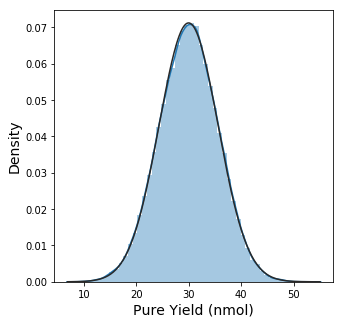

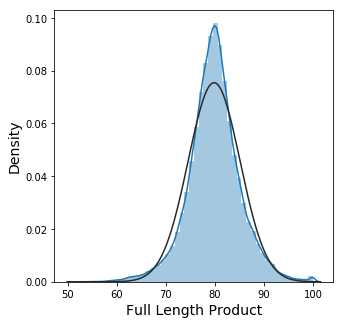

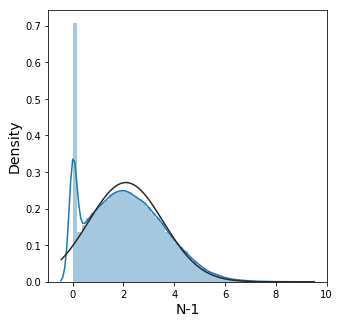

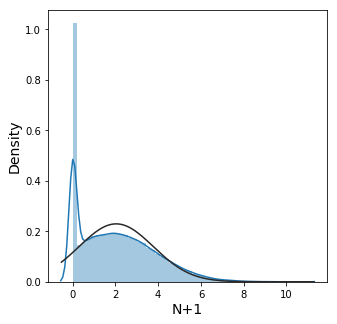

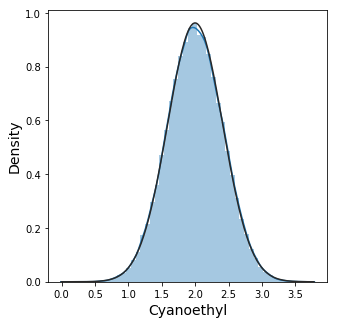

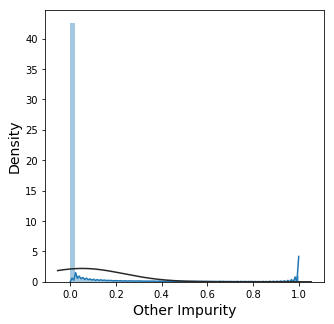

In [10]:
for metric in metric_columns:
    unit = ''
    if metric == 'pure_yield':
        unit = 'nmol'
    plot_and_save_distribution(df, metric, unit=unit, fit_dist=scipy.stats.distributions.norm,
                               save_fig=False)

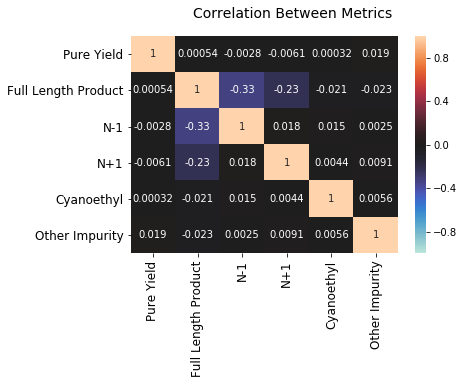

In [11]:
fig, ax = plt.subplots()
fig.suptitle('Correlation Between Metrics', fontsize=14)
sns.heatmap(df[metric_columns].corr(), ax=ax, center=0, vmin=-1, vmax=1, annot=True)

# Make tick labels more readable
y_tick_labels = ax.get_yticklabels()
for label in y_tick_labels:
    new_text = label.get_text().replace('_', ' ').title()
    label.set_text(new_text)
ax.set_yticklabels(y_tick_labels, fontsize=12)

x_tick_labels = ax.get_xticklabels()
for label in x_tick_labels:
    new_text = label.get_text().replace('_', ' ').title()
    label.set_text(new_text)

ax.set_xticklabels(x_tick_labels, fontsize=12)
fig.savefig('metric_corr.png', bbox_inches='tight', dpi=300);

# Compare distributions of synthesis rollup to random sample of 96 wells

Notice that the resampled distribution has much more narrow distribution, compared to the population distribution of wells or the distribution of means on syntheses.

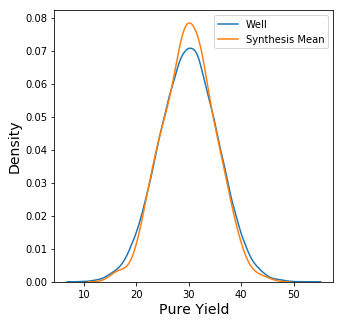

In [12]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.distplot(df['pure_yield'], ax=ax, label='Well', hist=False)
sns.distplot(synthesis_df['pure_yield'], ax=ax, label='Synthesis Mean', hist=False)
ax.legend(fontsize=10)
ax.set_xlabel('Pure Yield', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
fig.savefig('well_synthesis_pure_yield_comparison.png', dpi=150, bbox_inches='tight');

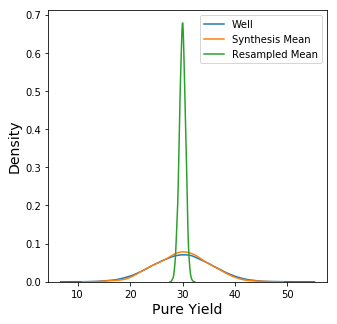

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.distplot(df['pure_yield'], ax=ax, label='Well', hist=False)
sns.distplot(synthesis_df['pure_yield'], ax=ax, label='Synthesis Mean', hist=False)
sns.distplot(resampled_df['pure_yield'], ax=ax, label='Resampled Mean', hist=False)
ax.legend(fontsize=10)
ax.set_xlabel('Pure Yield', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
fig.savefig('overall_pure_yield_comparison.png', dpi=150, bbox_inches='tight');

In [14]:
summary_df = pd.concat([df['pure_yield'].describe(),
                        synthesis_df['pure_yield'].describe(),
                        resampled_df['pure_yield'].describe()], axis=1)
summary_df.columns = ['well', 'synthesis', 'resampled']
summary_df

,well,synthesis,resampled
count,96000.000000,1000.000000,1000.000000
mean,29.952699,29.952699,29.965815
std,5.605424,5.024874,0.582975
min,8.570670,14.882613,28.058792
25%,26.159849,26.566080,29.584084
50%,29.989439,29.940463,29.981412
75%,33.763528,33.296014,30.364770
max,53.332479,45.253184,31.858409


In [15]:
summary_df.loc['std', :]

well         5.605424
synthesis    5.024874
resampled    0.582975
Name: std, dtype: float64

In [16]:
summary_df.loc['std', 'well'] / 96**0.5

0.5721012351528224

## Wells on a synthesis are not independent

While the random sample of 96 wells has a much more narrow distribution (due to the central limit theorem), an individual synthesis is _not_ a random sample of 96 wells. Each well in a synthesis is not independent of the others because, for example, a bad reagent bottle affects the whole synthesis. Plotting the left half of the 96-well plate against the right half shows how the wells on the synthesis are correlated.

In [17]:
left_mask = df.well_position % 12 <= 5

In [18]:
df.loc[left_mask, 'pure_yield'].mean()

29.961494842310266

In [19]:
df.loc[~left_mask, 'pure_yield'].mean()

29.943902698202326

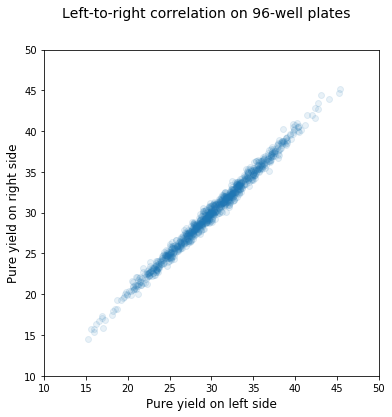

In [20]:
fig, ax = plt.subplots(figsize=(6, 6))
fig.suptitle('Left-to-right correlation on 96-well plates', fontsize=14)
ax.set_xlabel('Pure yield on left side', fontsize=12)
ax.set_ylabel('Pure yield on right side', fontsize=12)
ax.set_xlim([10, 50])
ax.set_ylim([10, 50])
plt.scatter(synthesis_df['pure_yield_left'],
            synthesis_df['pure_yield_right'], alpha=0.1)
fig.savefig('plate_correlation.png', bbox_inches='tight', dpi=150);

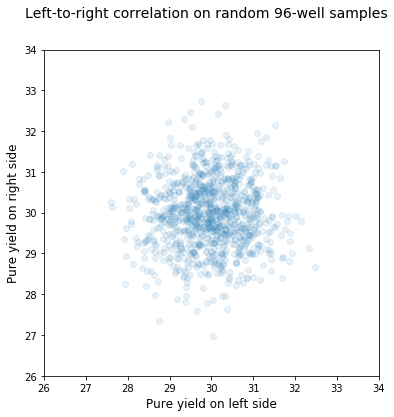

In [21]:
fig, ax = plt.subplots(figsize=(6, 6))
fig.suptitle('Left-to-right correlation on random 96-well samples', fontsize=14)
ax.set_xlabel('Pure yield on left side', fontsize=12)
ax.set_ylabel('Pure yield on right side', fontsize=12)
ax.set_xlim([26, 34])
ax.set_ylim([26, 34])
plt.scatter(resampled_df['pure_yield_left'],
            resampled_df['pure_yield_right'], alpha=0.1)
fig.savefig('random_correlation.png', bbox_inches='tight', dpi=150);

## Difference between "experiments" using well vs. synthesis as independent unit

In [22]:
# Find two syntheses with somewhat different yields
synthesis_df.loc[synthesis_df['pure_yield'] > 32, 'synthesis_id'].unique()[:10]

array([ 1,  2,  4,  7,  9, 15, 18, 25, 31, 33])

In [23]:
synthesis_df.loc[synthesis_df['pure_yield'] < 28, 'synthesis_id'].unique()[:10]

array([ 3,  5,  6, 13, 16, 20, 21, 22, 26, 28])

In [24]:
synthesis_df.head()

,cyanoethyl,cyanoethyl_std,full_length_product,full_length_product_std,n+1,n+1_std,n-1,n-1_std,other_impurity,other_impurity_std,pure_yield,pure_yield_left,pure_yield_right,pure_yield_std,synthesis_id
0,2.200573,0.330459,66.944464,2.649496,3.455595,1.841868,3.627929,1.611462,0.048238,0.185853,32.199379,32.072160,32.326599,2.310163,1
1,2.070642,0.324617,77.306542,2.650520,2.208966,1.614841,2.055224,1.415506,0.004314,0.035018,32.754828,33.003157,32.506498,2.516568,2
2,2.153704,0.295581,70.074465,2.719915,2.524476,1.764937,2.459956,1.442385,0.138598,0.262326,26.431237,26.687269,26.175206,2.331140,3
3,1.631276,0.352804,83.313487,3.252847,1.449001,1.368400,1.617999,1.361580,0.086390,0.217208,36.596891,36.863375,36.330407,2.590460,4
4,1.899983,0.318029,79.149523,2.852997,1.664587,1.547128,2.328662,1.402436,0.139353,0.280002,23.218476,23.451603,22.985349,2.671462,5


In [25]:
control_mask = df.synthesis_id == 3
treatment_mask = df.synthesis_id == 4

In [26]:
scipy.stats.ttest_ind(df.loc[treatment_mask, 'pure_yield'], 
                      df.loc[control_mask, 'pure_yield'])

Ttest_indResult(statistic=28.581010131059422, pvalue=1.0135067130818053e-70)

The 96 wells on a synthesis are not independent, so this is not a truly random sample of 96 wells. We need to compare the several synthesis means instead.

In [27]:
control_synthesis_ids = [3, 5, 7, 9]
treatment_synthesis_ids = [4, 6, 8, 10]

In [28]:
synthesis_df.loc[2:9, ['pure_yield', 'pure_yield_std', 'synthesis_id']]

,pure_yield,pure_yield_std,synthesis_id
2,26.431237,2.331140,3
3,36.596891,2.590460,4
4,23.218476,2.671462,5
5,27.248278,2.619070,6
6,32.587785,2.091420,7
7,29.524819,2.441735,8
8,38.142074,2.475056,9
9,30.541320,2.575673,10


In [29]:
control_mask = synthesis_df.synthesis_id.isin(control_synthesis_ids)
treatment_mask = synthesis_df.synthesis_id.isin(treatment_synthesis_ids)

In [30]:
scipy.stats.ttest_ind(synthesis_df.loc[treatment_mask, 'pure_yield'],
                      synthesis_df.loc[control_mask, 'pure_yield'])

Ttest_indResult(statistic=0.22831253121434059, pvalue=0.8269854568778328)